In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
path = "/home/dell/Jupyter notebook datas/csv files/VAH30.csv"
data_df = pd.read_csv(path, nrows=181,usecols=[1,7])

In [3]:
data_df

,Ecell_V,Temperature__C
0,3.529413,34.048470
1,3.536107,34.325005
2,3.540636,34.885979
3,3.544771,34.996593
4,3.548985,35.162514
...,...,...
176,4.194347,37.698757
177,4.198364,37.722458
178,4.199861,37.501228
179,4.199546,37.659248


In [4]:
x = data_df['Ecell_V'].values
y = data_df['Temperature__C'].values

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

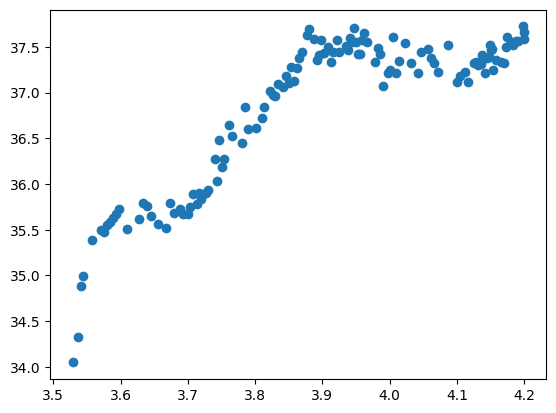

In [6]:
plt.scatter(x_train,y_train)

In [7]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1,1)

In [52]:
poly  = PolynomialFeatures(degree = 4)

In [53]:
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

In [54]:
poly.fit(x_poly_train,y_train)

PolynomialFeatures(degree=4)

In [55]:
linreg = LinearRegression()
linreg.fit(x_poly_train,y_train)

LinearRegression()

In [56]:
linreg.coef_

array([     0.        , -28900.49918963,  11214.80196024,  -1930.12365889,
          124.32633026])

In [57]:
y_pred = linreg.predict(x_poly_test)

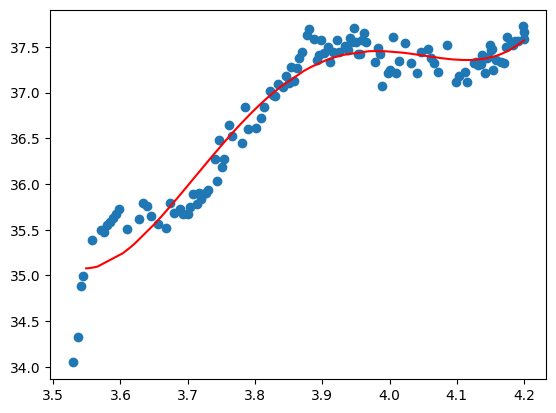

In [58]:
plt.scatter(x_train,y_train)
plt.plot(sorted(x_test),y_pred[np.argsort(x_test[:, 0])],color = "red")

In [59]:
r2_score(y_test,y_pred) 

0.9413844431057214

In [60]:
np.sqrt(np.mean(np.square(y_test-y_pred)))  #RMSE - Root Mean Squared Error 

0.18724744436518748

In [61]:
np.mean(abs(y_test-y_pred)) #MAE - Mean Absolute Error

0.15500322117089396

In [62]:
np.mean(np.abs((y_test-y_pred)/y_test)) #MAPE - Mean Absolute Percentage Error

0.0042402599525721086